These are essential when one has many features but need a reduced number of features . 
Sometimes we can use correllation or tree based methods to find out the important features 

# Why feature selection 

**1. Curse of dimensionality - Overfitting**

![](<https://miro.medium.com/max/577/1*tqjmErkEdzl2DrtjMg7GzQ.png>)

Incase we have more data columns  in the training set rows then chances are we will be able to fit the data accurately but we lose on generalization

 **2. Model Simplicity**

We lose explainability when we have a lot of features 

**3. Feature Purity For Model Accuracy**

Some times we have non informative features such as Name or ID variables or duplicate features and some times a largge number of features makes the model  bulky and ineeficient in production 

## The Feature Selection Methods

 The categories can be summarized into 
 > **Filter based** Specify some metric then based on that select the features that are satisfy  eg Remove unwanted features or uninformative , ie filter them out ....Duplicate features removal . We can use Correlation Measure ,Chi Square
 
 >**Wrapper Based** A set pf features considered as a search problem eg RFE
 
 >**Embedded** Algorithms with built in feature selection methods eg Lasso and Random Forest 

# THE Methods 

1. Pearson Correlation

We check the absolute value of the Pearson’s correlation between the target and numerical features in our dataset. We keep the top n features based on this criterion. 

There is also the aspect of calculating correlation feature between variables and remove the variables that are correlated with each other 

2. Chi- Squared

In this we calculate the chi-square metric between the target and the numerical variable and only select the variable with the maximum chi-squared values.

![](<https://miro.medium.com/max/700/0*l-qVhxRq6218__Qp.png>)

So let’s say we have 75 Right-Forwards in our dataset and 25 Non-Right-Forwards. We observe that 40 of the Right-Forwards are good, and 35 are not good. Does this signify that the player being right forward affects the overall performance?

|  obs            |Good          |  Not Good |
|-----------------|--------------|-----------|
|Not Right Forward| 20           | 5         |
|Right Forward    | 40           | 35        |

We calculate the chi-squared value:
To do this, we first find out the values we would expect to be falling in each bucket if there was indeed independence between the two categorical variables.
This is simple. We multiply the row sum and the column sum for each cell and divide it by total observations.

|  exp          |Good          |  Not Good |
|-----------------|--------------|-----------|
|Not Right Forward| 15          | 10      |
|Right Forward    | 45           | 25      |

so Good and NotRightforward Bucket Expected value= 25(Row Sum)*60(Column Sum)/100(Total Observations)
Why is this expected? Since there are 25% notRightforwards in the data, we would expect 25% of the 60 good players we observed in that cell. Thus 15 players.

3. Recurssive Feature Elimination


The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

4. Lasso Regression

![](<https://miro.medium.com/max/577/1*c515Qbsy4xujVcOsLWza8Q.png>)

For example, Lasso and RF have their own feature selection methods. Lasso Regularizer forces a lot of feature weights to be zero

2. Random Forest 

We can also use RandomForest to select features based on feature importance.
We calculate feature importance using node impurities in each decision tree. In Random forest, the final feature importance is the average of all decision tree feature importance.

We could also have used a LightGBM. Or an XGBoost object as long it has a feature_importances_ attribute.

## Application to some data set 

In [4]:
# import libraries to be used 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import seaborn as sns

In [13]:
df_=pd.read_csv(r"C:\Users\christopher\Downloads\datasets_11167_15520_train.csv")
df_.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Problem statement

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

**battery_power**: Total energy a battery can store in one time measured in mAh

**blue**: Has Bluetooth or not

**clock_speed**: the speed at which microprocessor executes instructions

**dual_sim**: Has dual sim support or not

**fc**: Front Camera megapixels

**four_g:** Has 4G or not

**int_memory**: Internal Memory in Gigabytes

**m_dep**: Mobile Depth in cm

**mobile_wt**: Weight of mobile phone

**n_cores**: Number of cores of the processor

**pc**: Primary Camera megapixels

**px_height**
Pixel Resolution Height

**px_width**: Pixel Resolution Width

**ram**: Random Access Memory in MegaBytes

**sc_h**: Screen Height of mobile in cm

**sc_w**: Screen Width of mobile in cm

**talk_time**: the longest time that a single battery charge will last when you are

**three_g**: Has 3G or not

**touch_screen:** Has touch screen or not

**wifi**: Has wifi or not**

In [21]:
# let us do some simple transformation

X=df_[['battery_power','blue','clock_speed','dual_sim','fc',
          'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc','px_height', 'px_width', 'ram', 
          'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]
X.head()
# df_['price_range'].value_counts()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [29]:
y=df_['price_range']

## Correlation

In [30]:
num_feats=10
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

10 selected features


In [34]:
cor_feature

['three_g',
 'mobile_wt',
 'touch_screen',
 'pc',
 'sc_w',
 'int_memory',
 'px_height',
 'px_width',
 'battery_power',
 'ram']

## correlation heat map 
Correlation states how the features are related to each other or the target variable.
Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)
Heatmap makes it easy to identify which features are most related to the target variable

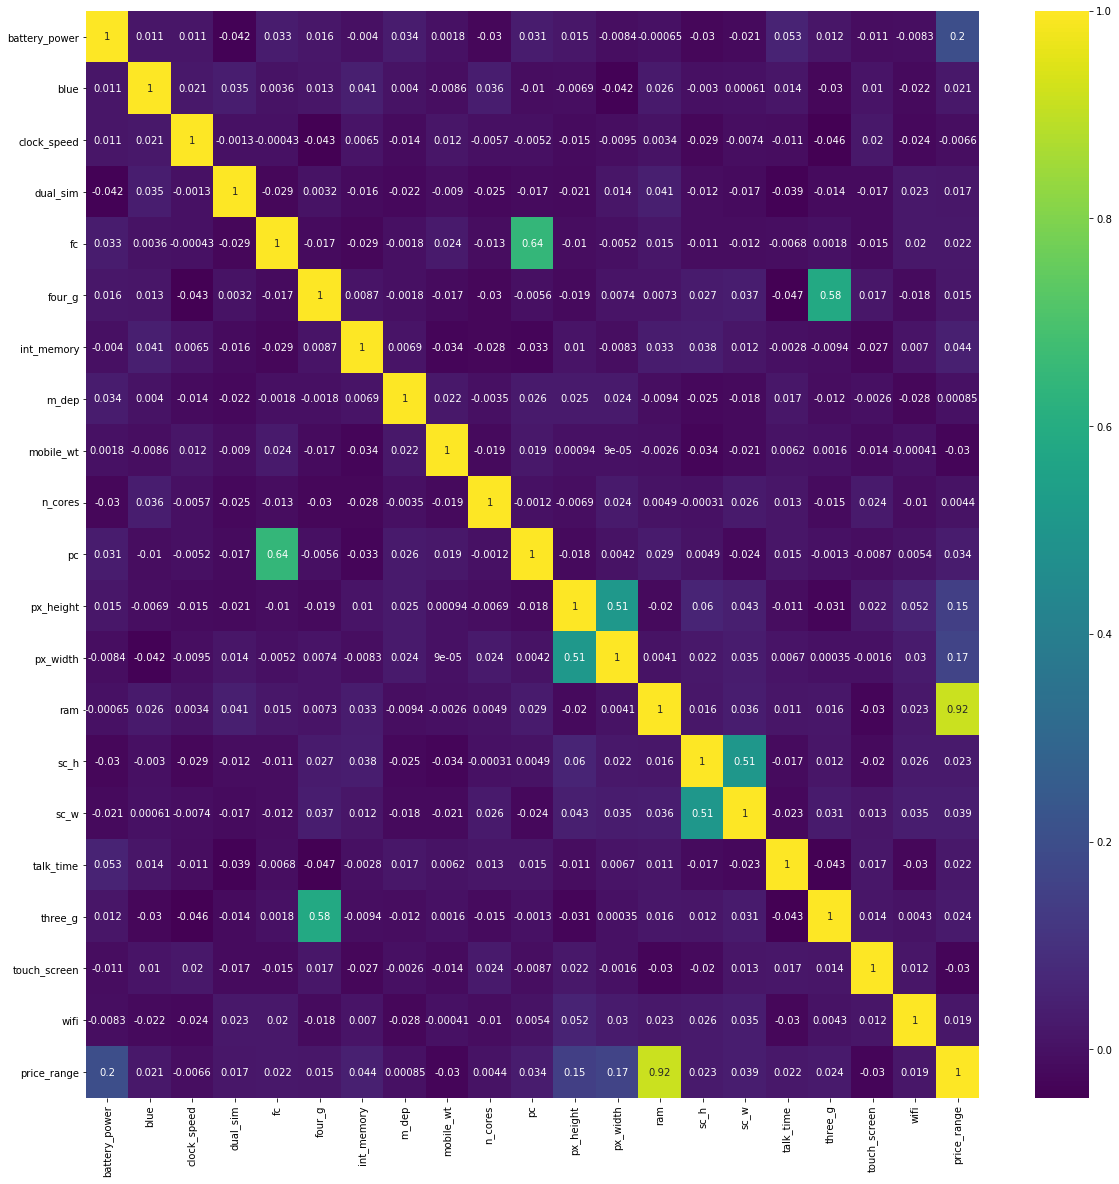

In [71]:
corrmat = df_.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df_[top_corr_features].corr(),annot=True,cmap="viridis")

If we have a look at the last row i.e price range, we see how the price range is correlated with other features, ram is the highly correlated with price range followed by battery power, pixel height and width while m_dep, clock_speed and n_cores seems to be least correlated with price_range.

# Chi square 

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

C:\Users\christopher\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


10 selected features


In [33]:
chi_feature

['battery_power',
 'four_g',
 'int_memory',
 'mobile_wt',
 'n_cores',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'touch_screen']

## Lasso 

In [35]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

C:\Users\christopher\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\christopher\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


10 selected features


In [36]:
embeded_lr_feature

['battery_power',
 'four_g',
 'int_memory',
 'mobile_wt',
 'n_cores',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'wifi']

## Tree selector 

In [39]:

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

4 selected features


In [52]:
## Alternative siimpler method 
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.06123679 0.01925401 0.03180875 0.01733578 0.02883529 0.01823228
 0.03195247 0.03089746 0.03122377 0.02840366 0.03015891 0.04751784
 0.04884876 0.42144137 0.03143579 0.03318907 0.03446784 0.01421751
 0.01773137 0.02181128]


C:\Users\christopher\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


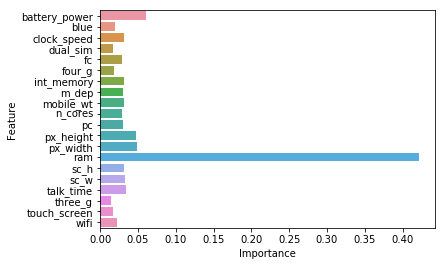

In [60]:
feature_importance=pd.DataFrame({"Feature":X.columns,
                                "Importance":model.feature_importances_})
feature_importance.head()

sns.barplot(y="Feature",x="Importance",data=feature_importance)

In [63]:
feature_importance.sort_values("Importance",ascending=False).head()

,Feature,Importance
13,ram,0.421441
0,battery_power,0.061237
12,px_width,0.048849
11,px_height,0.047518
16,talk_time,0.034468


In [67]:
embeded_rf_feature

['battery_power', 'px_height', 'px_width', 'ram']

## Gradient Boosting 

In [42]:
!pip install lightgbm

In [43]:
from lightgbm import LGBMClassifier

## perhaps you need to do some hyper parameter tuning to havee the best values for these 
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

9 selected features


In [ ]:
feature_name=X.columns

In [51]:
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Pearson,Chi-2,Logistics,Random Forest,LightGBM,Total
1,ram,True,True,True,True,True,5
2,px_width,True,True,True,True,True,5
3,px_height,True,True,True,True,True,5
4,battery_power,True,True,True,True,True,5
5,mobile_wt,True,True,True,False,True,4
6,int_memory,True,True,True,False,True,4
7,touch_screen,True,True,False,False,False,2
8,sc_w,True,False,False,False,True,2
9,sc_h,False,True,True,False,False,2
10,pc,True,False,False,False,True,2
